In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

root_1 = "//data/becker/dopl4670/TDSE_Jobs/Argon/Argon_10_800_2E14_1/"
root_2 = "//data/becker/dopl4670/TDSE_Jobs/Argon/Argon_10_800_2E14_-1/"

leaf_PES = "PES_files/total.npy"
leaf_E = "PES_files/E.npy"



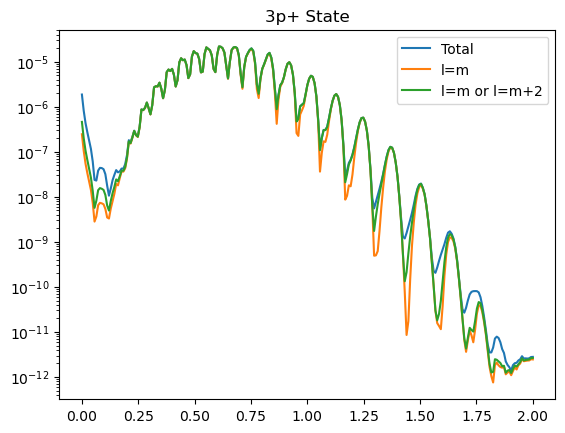

In [2]:
# For m = +1

with open(root_1+"PES_files/partial_pes.json", "rb") as fp:
    partial_spectra = pickle.load(fp)
E_range = np.load(root_1+"PES_files/E.npy")

total_plus = 0
total_plus_r1 = 0
total_minus_r2 =0
  
for (l,m),y in partial_spectra.items():
    total_plus += np.real(y)
    if l == m:
        total_plus_r1 += np.real(y)
    if l ==m or l == m+2:
        total_minus_r2 += np.real(y)

plt.semilogy(E_range, total_plus, label="Total")
plt.semilogy(E_range, total_plus_r1, label="l=m")
plt.semilogy(E_range, total_minus_r2, label="l=m or l=m+2")
plt.title("3p+ State")
plt.legend()







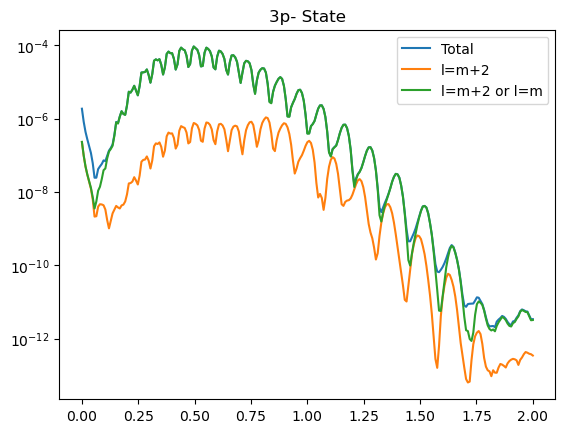

In [3]:
# For m = -1

with open(root_2+"PES_files/partial_pes.json", "rb") as fp:
    partial_spectra = pickle.load(fp)
E_range = np.load(root_2+"PES_files/E.npy")

total_minus = 0
total_minus_r1 = 0
total_minus_r2 = 0
  
for (l,m),y in partial_spectra.items():
    total_minus += np.real(y)
    if l == m+2:
        total_minus_r1 += np.real(y)
    if l == m+2 or l==m:
        total_minus_r2 += np.real(y)
   

plt.semilogy(E_range, total_minus, label="Total")
plt.semilogy(E_range, total_minus_r1, label="l=m+2")
plt.semilogy(E_range, total_minus_r2, label="l=m+2 or l=m")
plt.title("3p- State")
plt.legend()


(0.25, 1.0)

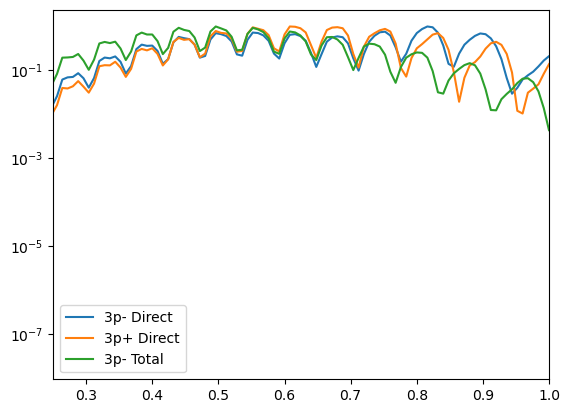

In [5]:
plt.semilogy(E_range,np.divide(total_minus_r1,np.max(total_minus_r1)),label = "3p- Direct ")
plt.semilogy(E_range,np.divide(total_plus_r1,np.max(total_plus_r1)),label = "3p+ Direct")

plt.semilogy(E_range,np.divide(total_minus,np.max(total_minus)),label = "3p- Total ")

plt.legend()
plt.xlim([0.25,1])